# Question: 1
**We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.
Task:
1.fitting it to the periodic function
2.plot the fit**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25] 
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
temp_max = np.array(Max)
temp_min = np.array(Min)
months = np.arange(12)


In [3]:
from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.sin((times + time_offset) * 2 * np.pi / times.max()))

res_max, _ = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, _ = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

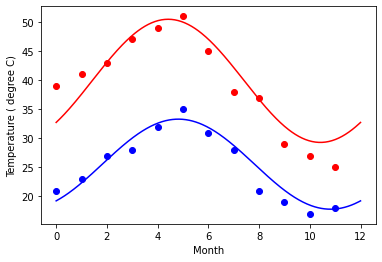

In [4]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ( degree C)')

plt.show()

# Question: 2
**Using the titanic dataset: Create a pie chart presenting the male/female proportion.
 Create a scatterplot with the Fare paid and the Age, differ the plot color by gender.**

In [5]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### A. Create a pie chart presenting the male/female proportion. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5758211d0>],
      dtype=object)

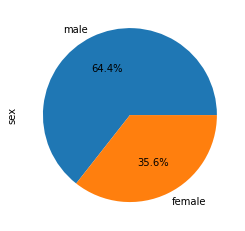

In [6]:
titanic['sex'].value_counts().plot.pie(subplots = True, autopct='%1.1f%%')

###  B. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender*

In [7]:
# Approach 1:

In [8]:
gender = pd.Categorical(titanic['sex']).rename_categories([0, 1])

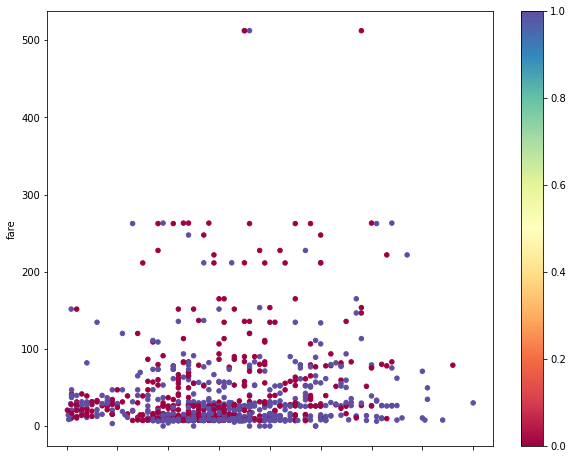

In [12]:
titanic.plot.scatter(x = 'age', y = 'fare',  c = gender, colormap='Spectral', figsize=(10,8))

In [10]:
# Approach 2:

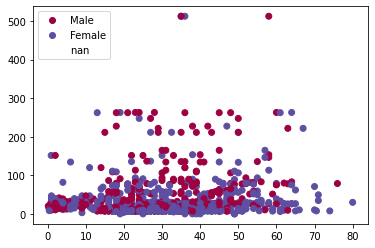

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = titanic['age']
y = titanic['fare']

sc = ax.scatter(x, y,  c = gender, cmap='Spectral')

L = plt.legend(*sc.legend_elements(), loc=2)
L.get_texts()[0].set_text('Male')
L.get_texts()[1].set_text('Female')


plt.show()